These notes are heavily adapted from and augment chapter 3 Sebastian Raschka's book (see below). Links to supplemental information have been included.

Copyright (c) 2015 - 2017 [Sebastian Raschka](sebastianraschka.com)

https://github.com/rasbt/python-machine-learning-book

[MIT License](https://github.com/rasbt/python-machine-learning-book/blob/master/LICENSE.txt)

# Support Vector Machines

Intuitively, **support vector machines** correspond to finding a hyperplane that separates two groups of data, but the plane now has a finite thickness. Above the "positive" hyperplane are data classified as $y^{(i)}=1$ while below the "negative" hyperplane, the data are classified as $y^{(i)}=-1$. Optimization comes when we attempt to maximize this thickness.

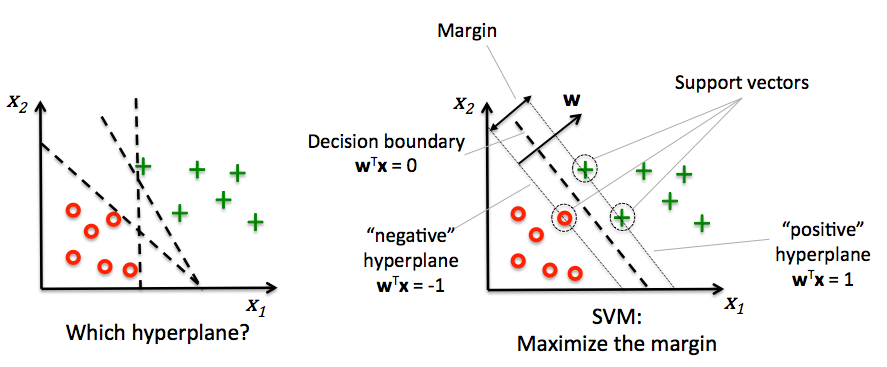

In [12]:
from IPython.display import Image
Image(filename='./images/03_07.png', width=700) 

The boundaries of this hyperplane are given by the *positive* and *negative* hyperplanes.

$$ w_0 + \mathbf{w}^T\mathbf{x} = 1 $$
$$ w_0 + \mathbf{w}^T\mathbf{x} =-1 $$

We now want to maximize the thickness, or the *margin*. If $\mathbf{x}_{pos}$ and $\mathbf{x}_{neg}$ are on the positive and negative hyperplanes respectively and are directly across from each other (i.e. $\mathbf{x}_{pos}-\mathbf{x}_{neq}\propto \mathbf{w}$), then subtracting the plane equations yields

$$ \mathbf{w}^T(\mathbf{x}_{pos}-\mathbf{x}_{neg}) = 2 $$
$$ \mathbf{\hat w}^T(\mathbf{x}_{pos}-\mathbf{x}_{neg}) = 2/||\mathbf{w}|| $$

$$||\mathbf{x}_{pos}-\mathbf{x}_{neg}||=2/||\mathbf{w}|| $$

Of course, this is all subject to the constraint that our data is correctly classified. Mathematically speaking,

$$ w_0 + \mathbf{w}^T\mathbf{x}^{(i)} \geq 1 if y^{(i)}=1 $$
$$ w_0 + \mathbf{w}^T\mathbf{x}^{(i)} \leq -1 if y^{(i)}=-1 $$

which is equivalent to 

$$ y^{(i)}\left( w_0 + \mathbf{w}^{(i)}\mathbf{x}^{(i)}\right) \geq 1 $$

This is a **solved problem** called [quadratic programming](https://en.wikipedia.org/wiki/Quadratic_programming).

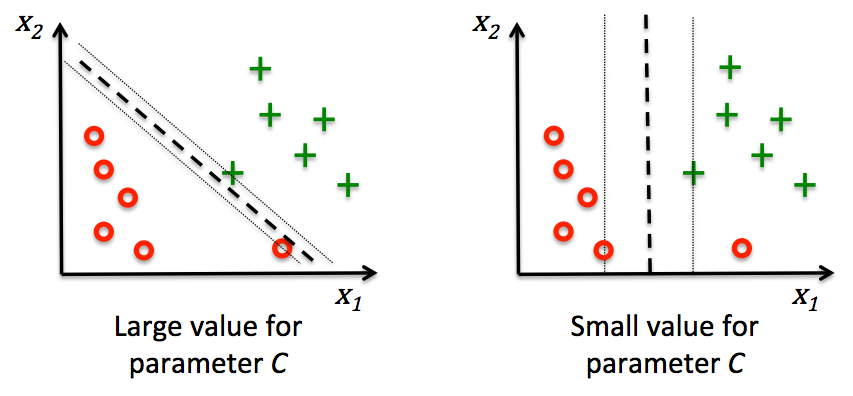

In [13]:
Image(filename='./images/03_08.png', width=600) 

In [19]:
# Step 1: Load data
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

# Step 2: Split data`
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = sc.transform(X)
y_combined = y

In [23]:
# Step 3: Import chosen algorithm
from sklearn.svm import SVC

# Step 4: Instantiate with chosen parameters
svm = SVC(kernel='linear', C=1.0, random_state=0)

# Step 5: Fit the model
svm.fit(X_train_std, y_train)

# Step 6: Predict
y_pred = svm.predict(X_test_std)

# Step 7: 

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9777777777777777

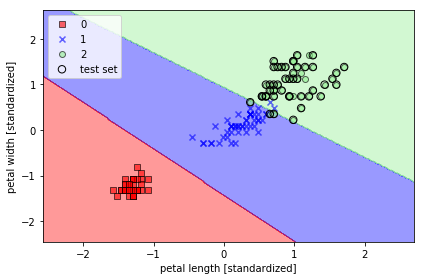

In [24]:
import matplotlib.pyplot as plt
from PlotDecision import plot_decision_regions
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_linear.png', dpi=300)
plt.show()

The support vectors are available as

In [25]:
svm.support_vectors_

array([[-1.18520034, -1.06296747],
       [-1.18520034, -0.9343827 ],
       [ 0.48521625,  0.48004983],
       [ 0.48521625,  0.22288028],
       [ 0.37385514,  0.48004983],
       [ 0.42953569,  0.22288028],
       [ 0.59657735,  0.35146505],
       [-0.46135315, -0.16287405],
       [ 0.37385514,  0.35146505],
       [-0.29431149, -0.29145882],
       [ 0.31817459,  0.22288028],
       [ 0.59657735,  0.35146505],
       [ 0.6522579 ,  0.6086346 ],
       [ 0.5408968 ,  0.73721938],
       [ 0.6522579 ,  0.35146505],
       [ 0.59657735,  0.73721938],
       [ 0.70793846,  0.35146505],
       [ 0.37385514,  0.6086346 ],
       [ 0.6522579 ,  0.86580415],
       [ 0.70793846,  0.86580415],
       [ 0.70793846,  0.73721938],
       [ 1.09770233,  0.48004983],
       [ 0.5408968 ,  0.73721938],
       [ 0.70793846,  0.86580415]])

# Things to Consider

SVMs are a powerful classification method for a number of reasons:

- Their dependence on relatively few support vectors means that they are very compact models, and take up very little memory.
- Once the model is trained, the prediction phase is very fast.
- Because they are affected only by points near the margin, they work well with high-dimensional data—even data with more dimensions than samples, which is a challenging regime for other algorithms.
- Their integration with kernel methods makes them very versatile, able to adapt to many types of data.

However, SVMs have several disadvantages as well:

- The scaling with the number of samples $N$ is $\mathcal{O}[N^3]$ at worst, or $\mathcal{O}[N^2]$ for efficient implementations. For large numbers of training samples, this computational cost can be prohibitive.
- The results are strongly dependent on a suitable choice for the softening parameter $C$. This must be carefully chosen via cross-validation, which can be expensive as datasets grow in size.
- The results do not have a direct probabilistic interpretation. This can be estimated via an internal cross-validation (see the ``probability`` parameter of ``SVC``), but this extra estimation is costly.

With those traits in mind, I generally only turn to SVMs once other simpler, faster, and less tuning-intensive methods have been shown to be insufficient for my needs.
Nevertheless, if you have the CPU cycles to commit to training and cross-validating an SVM on your data, the method can lead to excellent results.

-[Jake van der Plas](Resources/VanDerPlas/05.05-Support-Vector-Machines.ipynb)

# Further Reading

[Jake van der Plas, section 5.07](Resources/VanDerPlas/05.07-Support-Vector-Machines.ipynb)

[*Support Vector Machines*, M.A. Hearst](http://www.cs.cmu.edu/afs/cs.cmu.edu/usr/guestrin/www/Class/10701/readings/hearst98.pdf)